#Биномиальное распределение
Количество успешных попыток автоматического распознавания редкого вида птиц по пению нейросетью за 50 анализов аудиозаписей, если точность алгоритма составляет p=0.8.

Составить закон распределения, найти математическое ожидание, дисперсию, среднее квадратичное отклонение и моду. Построить многоугольник распределения.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, geom, hypergeom

np.set_printoptions(formatter={'float_kind': '{:0.4f}'.format})
pd.options.display.float_format = '{:,.4f}'.format

In [10]:
n, p = 10, 0.8
X = np.arange(0, n + 1)

binomial_dist = binom(n, p)
probabilities = binomial_dist.pmf(X)

df = pd.DataFrame(data=probabilities.reshape(1, -1), columns=X, index=['p'])
df

,0,1,2,3,4,5,6,7,8,9,10
p,0.0000,0.0000,0.0001,0.0008,0.0055,0.0264,0.0881,0.2013,0.3020,0.2684,0.1074


In [11]:
print(f'Математическое ожидание = {binomial_dist.mean()}')
print(f'Дисперсия = {binomial_dist.var()}')
print(f'Стандартное отклонение = {binomial_dist.std()}')

max_prob = probabilities.max()
mode = [int(x) for x in X if round(probabilities[x], 6) == round(max_prob, 6)]
print(f'Мода = {mode}')

Математическое ожидание = 8.0
Дисперсия = 1.5999999999999988
Стандартное отклонение = 1.2649110640673513
Мода = [8]


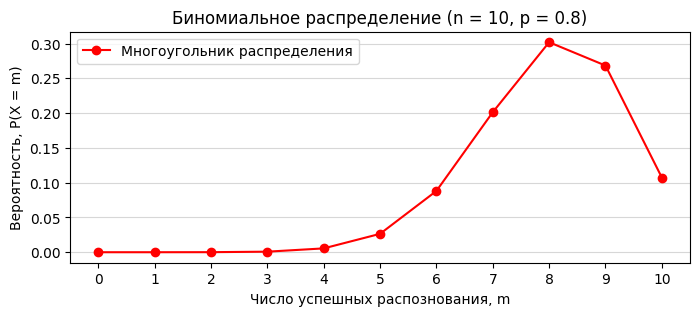

In [12]:
plt.figure(figsize=(8, 3))
plt.plot(X, probabilities, marker='o', linestyle='-', color='red', label='Многоугольник распределения')
plt.title(f'Биномиальное распределение (n = {n}, p = {p})')
plt.xlabel('Число успешных распознования, m')
plt.ylabel('Вероятность, P(X = m)')
plt.xticks(X)
plt.grid(axis='y', alpha=0.5)
plt.legend()
plt.show()

#Распределение Пуассона
Интернет-магазин отправляет 1 000 000 посылок в месяц. Вероятность того, что одна случайно выбранная посылка будет повреждена при доставке p=0,000002.

Составить закон распределения, найти математическое ожидание, дисперсию, среднее квадратичное отклонение и моду. Построить многоугольник распределения.

In [14]:
n, p = 1_000_000, 0.000002
lmb = n * p

X = np.arange(0, 10)

poisson_dist = poisson(lmb)
probabilities = poisson_dist.pmf(X)

df = pd.DataFrame(data=probabilities.reshape(1, -1), columns=X, index=['p'])
df

,0,1,2,3,4,5,6,7,8,9
p,0.1353,0.2707,0.2707,0.1804,0.0902,0.0361,0.0120,0.0034,0.0009,0.0002


In [15]:
print(f'Математическое ожидание = {poisson_dist.mean()}')
print(f'Дисперсия = {poisson_dist.var()}')
print(f'Стандартное отклонение = {poisson_dist.std()}')

max_prob = probabilities.max()
mode = [int(x) for x in X if round(probabilities[x], 6) == round(max_prob, 6)]
print(f'Мода = {mode}')

Математическое ожидание = 2.0
Дисперсия = 2.0
Стандартное отклонение = 1.4142135623730951
Мода = [1, 2]


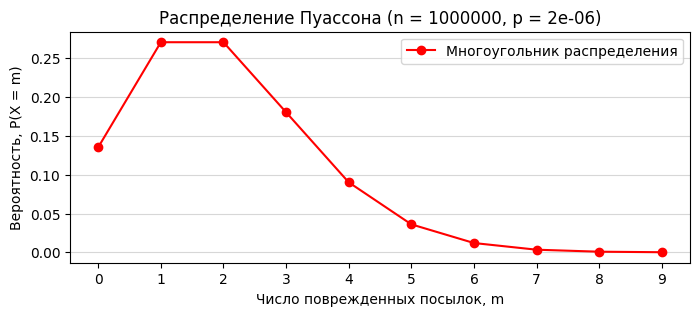

In [16]:

plt.figure(figsize=(8, 3))
plt.plot(X, probabilities, marker='o', linestyle='-', color='red', label='Многоугольник распределения')
plt.title(f'Распределение Пуассона (n = {n}, p = {p})')
plt.xlabel('Число поврежденных посылок, m')
plt.ylabel('Вероятность, P(X = m)')
plt.xticks(X)
plt.grid(axis='y', alpha=0.5)
plt.legend()
plt.show()

#Геометрическое распределение
Количество перезагрузок квантового компьютера до первого успешного запуска алгоритма, если вероятность стабильной работы при старте p=0.17.

Составить закон распределения, найти математическое ожидание, дисперсию, среднее квадратичное отклонение и моду. Построить многоугольник распределения.

In [17]:
p = 0.17

X = np.arange(1, 16)
geom_dist = geom(p)
probabilities = geom_dist.pmf(X)

df = pd.DataFrame(data=probabilities.reshape(1, -1), columns=X, index=['p'])
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
p,0.1700,0.1411,0.1171,0.0972,0.0807,0.0670,0.0556,0.0461,0.0383,0.0318,0.0264,0.0219,0.0182,0.0151,0.0125


In [18]:
print(f'Математическое ожидание = {geom_dist.mean()}')
print(f'Дисперсия = {geom_dist.var()}')
print(f'Стандартное отклонение = {geom_dist.std()}')

max_prob = probabilities.max()
mode = [int(x) for x in X if round(probabilities[x - 1], 6) == round(max_prob, 6)]
print(f'Мода = {mode}')

Математическое ожидание = 5.88235294117647
Дисперсия = 28.719723183391
Стандартное отклонение = 5.359078575967234
Мода = [1]


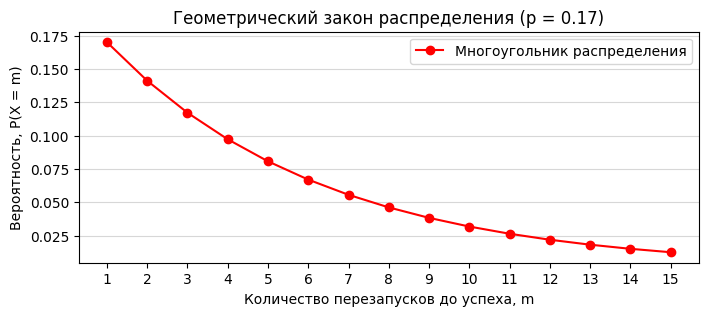

In [20]:
plt.figure(figsize=(8, 3))
plt.plot(X, probabilities, marker='o', linestyle='-', color='red', label='Многоугольник распределения')
plt.title(f'Геометрический закон распределения (p = {p})')
plt.xlabel('Количество перезапусков до успеха, m')
plt.ylabel('Вероятность, P(X = m)')
plt.xticks(X)
plt.grid(axis='y', alpha=0.5)
plt.legend()
plt.show()

#Гипергеометрический закон распределения
Число подлинных картин Ван Гога в случайной выборке из 12 полотен, доставленных для экспертизы из коллекции из 80 работ, среди которых 5 подделок.

Составить закон распределения, найти математическое ожидание, дисперсию, среднее квадратичное отклонение и моду. Построить многоугольник распределения.

In [21]:
N, M, n = 80, (80-5), 12

X = np.arange(0, n + 1)
hypergeom_dist = hypergeom(N, M, n)
probabilities = hypergeom_dist.pmf(X)

df = pd.DataFrame(data=probabilities.reshape(1, -1), columns=X, index=['p'])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
p,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0014,0.0208,0.1376,0.4065,0.4336


In [28]:
print(f'Математическое ожидание = {hypergeom_dist.mean()}')
print(f'Дисперсия = {hypergeom_dist.var()}')
print(f'Стандартное отклонение = {hypergeom_dist.std()}')

max_prob = probabilities.max()
mode = [int(x) for x in X if round(probabilities[x], 6) == round(max_prob, 6)]
print(f'Мода = {mode}')

Математическое ожидание = 11.25
Дисперсия = 0.6052215189873418
Стандартное отклонение = 0.777959844071236
Мода = [12]


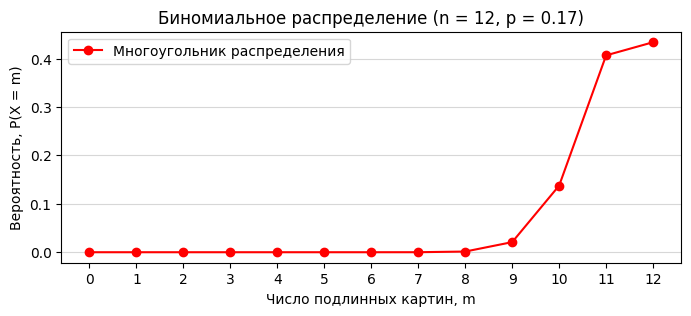

In [29]:
plt.figure(figsize=(8, 3))
plt.plot(X, probabilities, marker='o', linestyle='-', color='red', label='Многоугольник распределения')
plt.title(f'Биномиальное распределение (n = {n}, p = {p})')
plt.xlabel('Число подлинных картин, m')
plt.ylabel('Вероятность, P(X = m)')
plt.xticks(X)
plt.grid(axis='y', alpha=0.5)
plt.legend()
plt.show()